In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_train = pd.read_csv('./data/train.csv')

In [28]:
df_train.isnull().sum() / df_train.shape[0]

id          0.000000
keyword     0.008013
location    0.332720
text        0.000000
target      0.000000
dtype: float64

About **33% of the data is missing** the `location` feature, and just **under 1% of the data** is missing the `keyword` feature. These likely won't be needed to accomplish our goal.

In [49]:
df_train.shape # What is the shape of our data?

(7613, 8)

In [30]:
split_text_len = lambda x: len(x.split()) # Let's find out how long our text is by word

In [31]:
num_chars = lambda x: len(x) # Let's find out how long our text is by char

In [32]:
df_train['length_in_words'] = df_train['text'].apply(split_text_len)

In [33]:
df_train['length_in_chars'] = df_train['text'].apply(num_chars)

In [34]:
df_train.head()

,id,keyword,location,text,target,length_in_words,length_in_chars
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,88


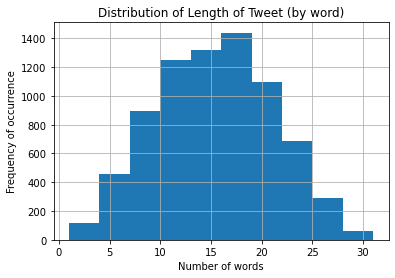

In [36]:
df_train['length_in_words'].hist()
plt.title('Distribution of Length of Tweet (by word)')
plt.xlabel('Number of words')
plt.ylabel('Frequency of occurrence');

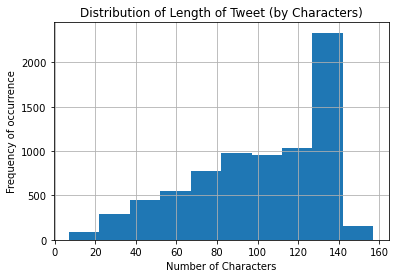

In [37]:
df_train['length_in_chars'].hist()
plt.title('Distribution of Length of Tweet (by Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency of occurrence');

The number of words used in the tweets is **normally distributed**, while the number of characters used in tweets **trends upward toward 144 (the character limit) and then plummets**.

### Extracting hashtags

Extracting the hashtags from a post may be useful. From a quick glance at the data, it looks like people use hashtags more literally than the rest of the text. Let's create a new column that is **only** the hashtags included in the text.

In [44]:
def find_hashtags(text):
    # Split the text, then find a hashtag and return the word minus the hashtag
    # This will let us look at just the hashtags, if we'd like
    return [word[1:] for word in text.split() if word.startswith('#')]

In [50]:
df_train['hashtags'] = df_train['text'].apply(find_hashtags)

### Next up!

I'd like to start to pre-process the text (remove stopwords, use stemming, etc.) and prepare it for modeling!